In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

def data_blocking(data,block_length):
    N = data.size
    l = N//block_length
    blocked_data = np.zeros(l)
    
    for i in range(1,l+1):
        x_i = 0
        for j in range(block_length):
            x_i += data[(i-1)*block_length + j]
        
        blocked_data[i-1]= x_i/block_length
    
    
    return blocked_data

def bootstrap_data(data):
    N = data.size
    new_data = np.zeros(N)
    for i in range(N):
        new_data[i] = data[np.random.randint(0,N-1)] 
    return new_data

def autocorr(data,lag):
    mean = np.mean(data)
    C_0 = np.mean((data-mean)**2)
    if(lag>0):
        C_X = np.mean((data[lag:]-mean)*(data[:-lag]-mean))
    else:
        C_X = np.mean((data-mean)**2)
    return C_X/C_0

def autocorr_array(data,lag):
    x= np.zeros(lag)
    for i in range(lag):
        x[i] = autocorr(data,i)
    return x

def data_blocking_error(data,length):
    result = np.zeros((3,length))
    for i in range(1,length):
        N =len(data)
        x = []
        for j in range(0,N,i):
            a = data[j:j+i]
            x.append(np.std(a))
        result[0,i] = i
        result[1,i] = np.mean(x)
        result[2,i] = np.std(x)/np.sqrt(len(x))
   
    return result

def binder_cummulanten(Spin):
    m_4 = np.mean(Spin**4)
    m_2 = np.mean(Spin**2)**2
    binder_cumm = (3*m_2-m_4)/(3*m_2)
    return binder_cumm

def specific_heat(data):
    return np.std(data)**2



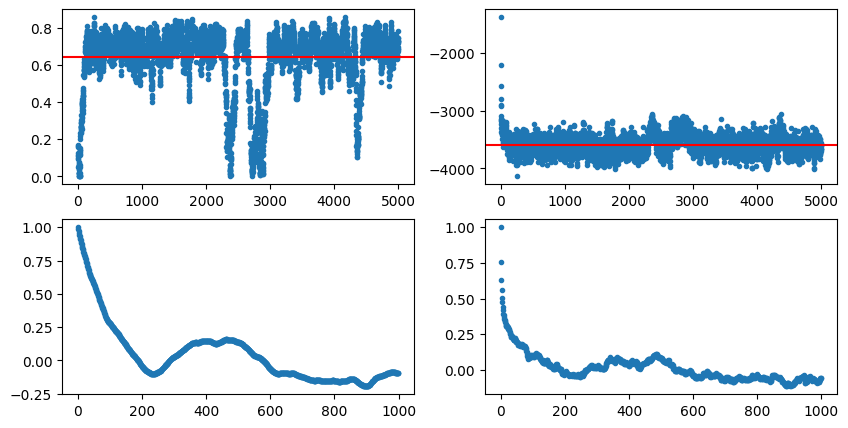

In [2]:
data = np.loadtxt("../data/analysis1.txt") # with initial phase, 5000 sweep
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin[200:])
energy_mean = np.mean(energy[200:])
ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 1000
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')

plt.show()

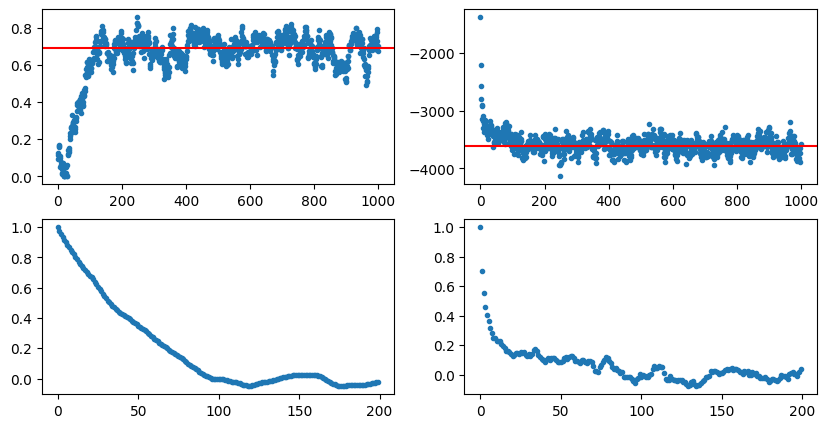

In [3]:
data = np.loadtxt("../data/analysis2.txt") # with initial phase, 1000 sweep
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin[200:])
energy_mean = np.mean(energy[200:])

ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 200
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')

plt.show()

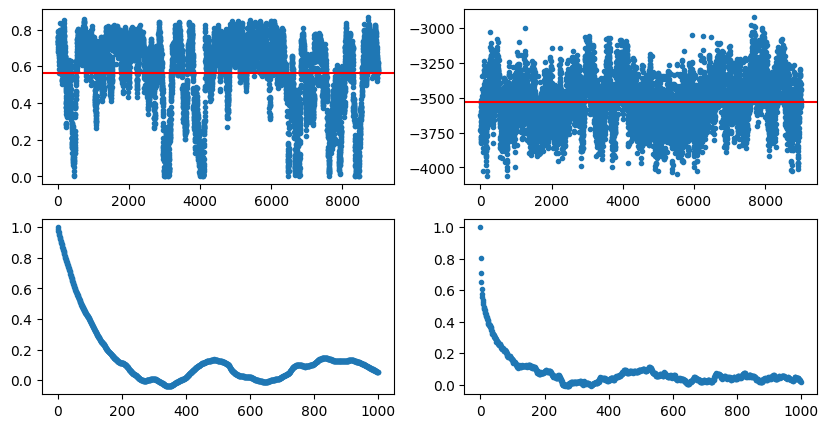

In [4]:
data = np.loadtxt("../data/analysis3.txt") # without initial phase, 10000 sweep after 1000 sweep ,near Tc
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin)
energy_mean = np.mean(energy)

ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 1000
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')

plt.show()

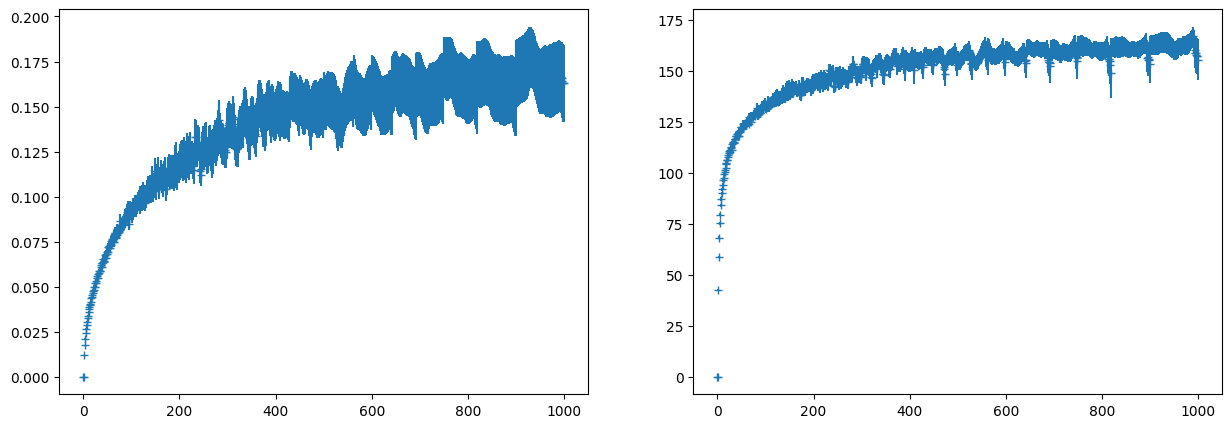

In [5]:
# Finde Blocklaenge
fig,ax = plt.subplots(1,2,figsize=(15,5))
length = 1000
x_1,y_1,y_err = data_blocking_error(spin,length)
ax[0].errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
x_1,y_1,y_err = data_blocking_error(energy,length)
ax[1].errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.show()
     

        

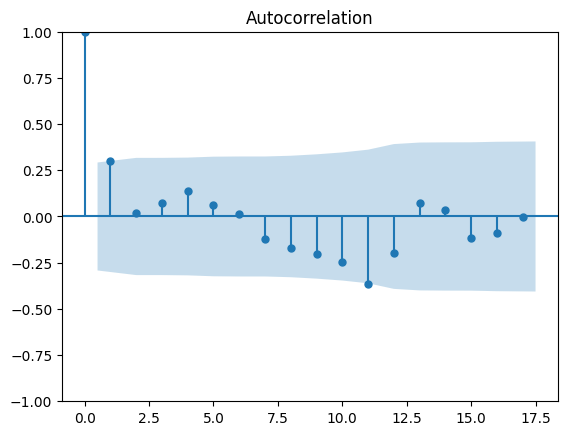

In [6]:
new_data = data_blocking(spin,200)
plot_acf(new_data)
plt.show()


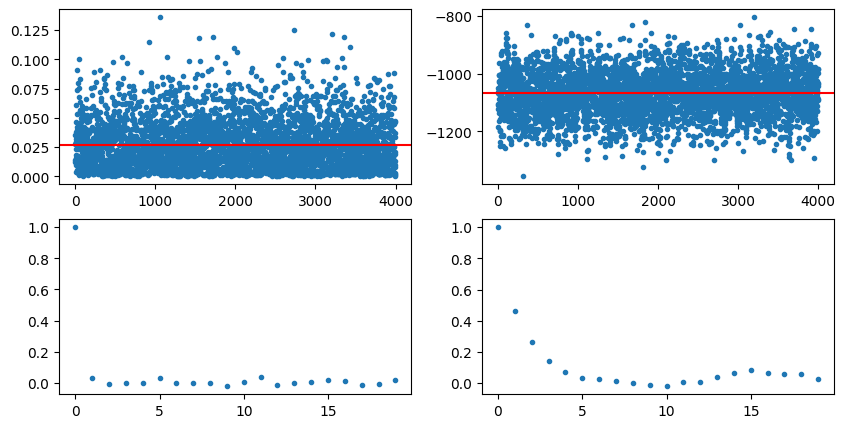

In [7]:
data = np.loadtxt("../data/analysis5.txt") 
# without initial phase, 5000 sweep after 1000 sweep, heigher temp
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin)
energy_mean = np.mean(energy)

ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 20
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')
plt.show()

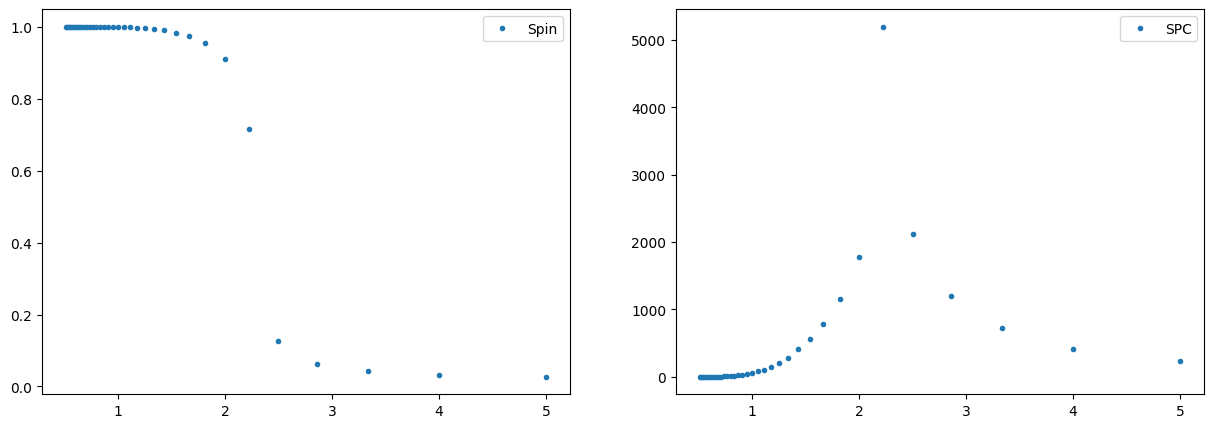

In [8]:
data = np.loadtxt("../data/analysis6.txt")
x_achse = data[:,0]
spin_mag = data[:,2]
spc_heat = data[:,1]
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_achse,spin_mag,'.',label='Spin')
ax[1].plot(x_achse,spc_heat,'.',label='SPC')

ax[0].legend()
ax[1].legend()
plt.show()


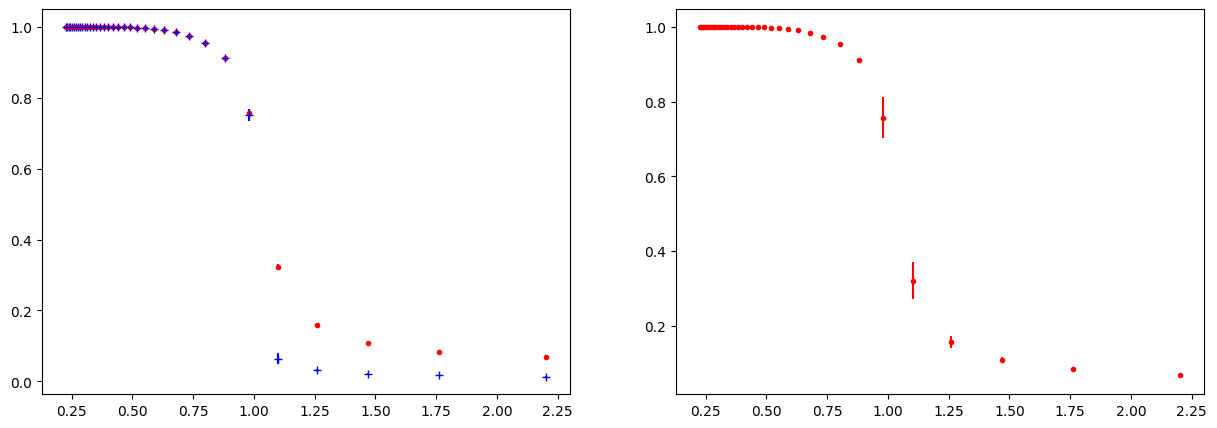

In [10]:
spin_simulation = np.loadtxt("../data/Spin_simulation1.txt").T
spin_simulation2 = np.loadtxt("../data/Spin_simulation2.txt").T

temp_dim = spin_simulation.shape[1]

fig, ax = plt.subplots(1,2,figsize=(15,5))
for i in range(temp_dim):
    x_achse = 1/spin_simulation[0,i]/2.27
    new_data = spin_simulation[1:,i]
    new_data_2 = spin_simulation2[1:,i]
    new_data = data_blocking(new_data,250)
    new_data_2 = data_blocking(new_data_2,250)
    new_data2 = np.array([]) 
    new_data2_2 = np.array([]) 
    for _ in range(1000): 
       new_data2 = np.append(new_data2,np.mean(bootstrap_data(new_data)))
       new_data2_2 = np.append(new_data_2,np.mean(bootstrap_data(new_data_2)))
    
    ax[0].errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2), fmt='.',c='r')
    ax[0].errorbar(x_achse,np.mean(new_data2_2),yerr=np.std(new_data2_2), fmt='+',c='b')
    ax[1].errorbar(x_achse,np.mean(new_data),np.std(new_data), fmt ='.',c='r')
plt.show()


In [11]:
bootstrap = spin_simulation[1:,5]
bootstrap=data_blocking(bootstrap,500)
new_data2 = np.array([]) 
for _ in range(5000): 
    new_data2 = np.append(new_data2,np.mean(bootstrap_data(bootstrap)))

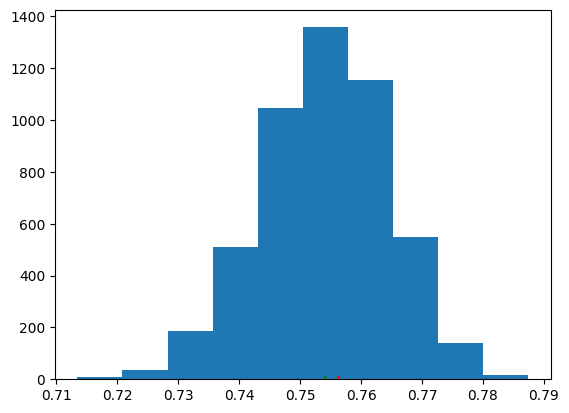

In [12]:
plt.hist(new_data2)
plt.vlines(np.mean(bootstrap),0,12,colors='r')
plt.vlines(np.mean(new_data2),0,12,colors='g')
plt.show()

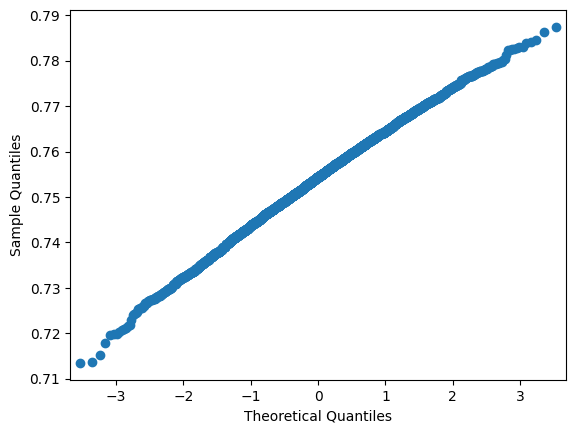

In [13]:
import statsmodels.api as sm 
import pylab as py

sm.qqplot(new_data2) 
py.show()

In [51]:
def spin_simulation_plot(spin_simulation,color='r',format='.',block_length=150,boot_length=500,label=None):
    temp_dim = spin_simulation.shape[1] 
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]/2.27
        new_data = spin_simulation[1:,i]
        new_data = data_blocking(new_data,block_length)
        new_data2 = np.array([]) 
        for _ in range(boot_length): 
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2),c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2),c=color,fmt=format,label=label)
        

    return

def binder_cum_plot(spin_simulation,color='r',format='.',block_length=20,boot_length=20,label=None):
    temp_dim = spin_simulation.shape[1] 
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        if(i>4):
            new_data = data_blocking(new_data,block_length)
            new_data2 = np.array([])
            for _ in range(boot_length): 
                new_data2 = np.append(new_data2,bootstrap_data(new_data))
            new_data2 = binder_cummulanten(new_data2)
        else:
            new_data2 = binder_cummulanten(new_data)      
        y_err = 0
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format,lw=8, errorevery=2)
        
        else:
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format,label=label)
        

    return

def specfic_heat_plot(spin_simulation,color='r',format='.',block_length=20,boot_length=2,label=None,L=1):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]/2.27
        new_data = spin_simulation[1:,i]
        new_data = data_blocking(new_data,block_length)
        new_data2 = np.array([],dtype=np.float64)
        for _ in range(boot_length): 
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        #new_data2 = np.mean(new_data2)
        #error = np.std(new_data2)
        new_data2 = specific_heat(new_data2)
        #y_err = binder_cummulanten(error)
        new_data2 = new_data2*spin_simulation[0,i]**2/L**2
        new_array = np.append(new_array,new_data2)
        y_err = 0
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format,label=label)
        

    return new_array



def onsager_soluttion(B):
    try:
        temp = (1-(np.sinh(2*B*np.sinh(2*B))**(-2)))**(1/8)
    except:
        print("Encounter Problem in calculation")
    return temp



/tmp/ipykernel_11921/821127039.py:71: RuntimeWarning: invalid value encountered in power
  temp = (1-(np.sinh(2*B*np.sinh(2*B))**(-2)))**(1/8)


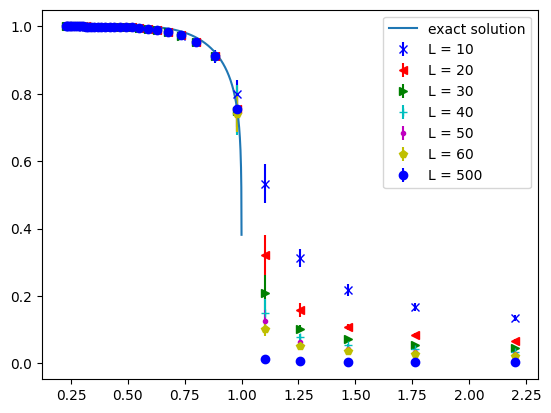

In [17]:
spin_simulation_1 = np.loadtxt("../data/Spin_L10.txt").T
spin_simulation_2 = np.loadtxt("../data/Spin_L20.txt").T
spin_simulation_3 = np.loadtxt("../data/Spin_L30.txt").T
spin_simulation_4 = np.loadtxt("../data/Spin_L40.txt").T
spin_simulation_5 = np.loadtxt("../data/Spin_L50.txt").T
spin_simulation_6 = np.loadtxt("../data/Spin_L60.txt").T
spin_simulation_7 = np.loadtxt("../data/sim_lol2.txt").T
a=np.delete(spin_simulation_7,np.s_[1:201],0)




length = 150
block = 150
spin_simulation_plot(spin_simulation_1,block_length=block,boot_length=length,color='b',format='x',label="L = 10")
spin_simulation_plot(spin_simulation_2,block_length=block,boot_length=length,color='r',format='<',label="L = 20")
spin_simulation_plot(spin_simulation_3,block_length=block,boot_length=length,color='g',format='>',label="L = 30")
spin_simulation_plot(spin_simulation_4,block_length=block,boot_length=length,color='c',format='+',label="L = 40")
spin_simulation_plot(spin_simulation_5,block_length=block,boot_length=length,color='m',format='.',label="L = 50")
spin_simulation_plot(spin_simulation_6,block_length=block,boot_length=length,color='y',format='p',label="L = 60")
spin_simulation_plot(a,block_length=10,boot_length=100,color='b',format='o',label="L = 500")
B = np.linspace(0.0001,2,10000)
x_achse = 1/B/2.27
y_achse = onsager_soluttion(B)
plt.plot(x_achse,y_achse,label='exact solution')
plt.legend()
plt.show()

In [18]:
spin_simulation_nearTc_1 = np.loadtxt("../data/Spin_L10_nearTc.txt").T
spin_simulation_nearTc_2 = np.loadtxt("../data/Spin_L20_nearTc.txt").T
spin_simulation_nearTc_3 = np.loadtxt("../data/Spin_L30_nearTc.txt").T
spin_simulation_nearTc_4 = np.loadtxt("../data/Spin_L40_nearTc.txt").T
spin_simulation_nearTc_5 = np.loadtxt("../data/Spin_L50_nearTc.txt").T
spin_simulation_nearTc_6 = np.loadtxt("../data/Spin_L60_nearTc.txt").T

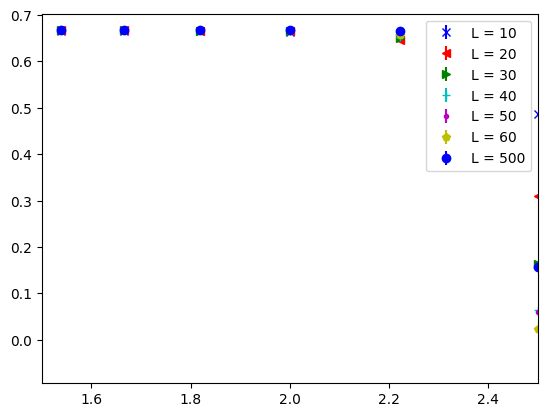

In [25]:
length = 20
block = 20
binder_cum_plot(spin_simulation_1,block_length=block,boot_length=length,color='b',format='x',label="L = 10")
binder_cum_plot(spin_simulation_2,block_length=block,boot_length=length,color='r',format='<',label="L = 20")
binder_cum_plot(spin_simulation_3,block_length=block,boot_length=length,color='g',format='>',label="L = 30")
binder_cum_plot(spin_simulation_4,block_length=block,boot_length=length,color='c',format='+',label="L = 40")
binder_cum_plot(spin_simulation_5,block_length=block,boot_length=length,color='m',format='.',label="L = 50")
binder_cum_plot(spin_simulation_6,block_length=block,boot_length=length,color='y',format='p',label="L = 60")
binder_cum_plot(a,block_length=5,boot_length=500,color='b',format='o',label="L = 500")

plt.xlim(1.5,2.5)
plt.legend()
plt.show()

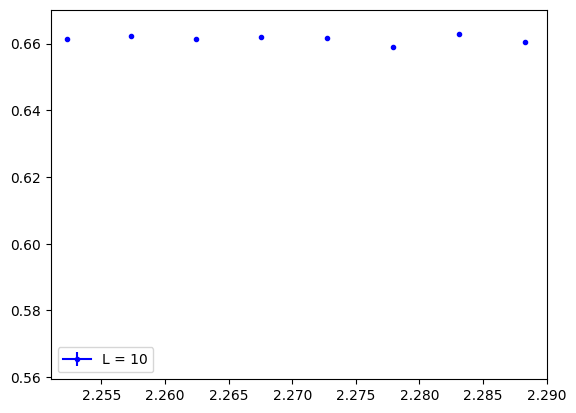

In [50]:
length = 150
block = 150
binder_cum_plot(spin_simulation_nearTc_1,block_length=block,boot_length=length,color='b',format='.-',label="L = 10")
"""binder_cum_plot(spin_simulation_nearTc_2,block_length=block,boot_length=length,color='r',format='-',label="L = 20")
binder_cum_plot(spin_simulation_nearTc_3,block_length=block,boot_length=length,color='g',format='-',label="L = 30")
binder_cum_plot(spin_simulation_nearTc_4,block_length=block,boot_length=length,color='c',format='-',label="L = 40")
binder_cum_plot(spin_simulation_nearTc_5,block_length=block,boot_length=length,color='m',format='-',label="L = 50")
binder_cum_plot(spin_simulation_nearTc_6,block_length=block,boot_length=length,color='y',format='-',label="L = 60")
#binder_cum_plot(a,block_length=5,boot_length=500,color='b',format='o',label="L = 500")"""

plt.xlim(2.251,2.29)
plt.legend()
plt.show()

In [53]:
Energy_simulation_1 = np.loadtxt("../data/Energy_L10.txt").T
Energy_simulation_2 = np.loadtxt("../data/Energy_L20.txt").T
Energy_simulation_3 = np.loadtxt("../data/Energy_L30.txt").T
Energy_simulation_4 = np.loadtxt("../data/Energy_L40.txt").T
Energy_simulation_5 = np.loadtxt("../data/Energy_L50.txt").T
Energy_simulation_6 = np.loadtxt("../data/Energy_L60.txt").T

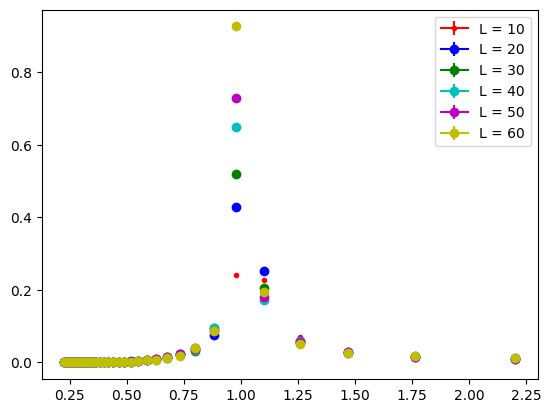

In [56]:
length = 25
block = 25
L_1 = specfic_heat_plot(Energy_simulation_1,block_length=block,boot_length=length,color='r',format='.-',label="L = 10", L = 10)
L_2 = specfic_heat_plot(Energy_simulation_2,block_length=block,boot_length=length,color='b',format='o-',label="L = 20", L = 20)
L_3 = specfic_heat_plot(Energy_simulation_3,block_length=block,boot_length=length,color='g',format='o-',label="L = 30", L = 30)
L_4 = specfic_heat_plot(Energy_simulation_4,block_length=block,boot_length=length,color='c',format='o-',label="L = 40", L = 40)
L_5 = specfic_heat_plot(Energy_simulation_5,block_length=block,boot_length=length,color='m',format='o-',label="L = 50", L = 50)
L_6 = specfic_heat_plot(Energy_simulation_6,block_length=block,boot_length=length,color='y',format='o-',label="L = 60", L = 60)

plt.legend()
plt.show()


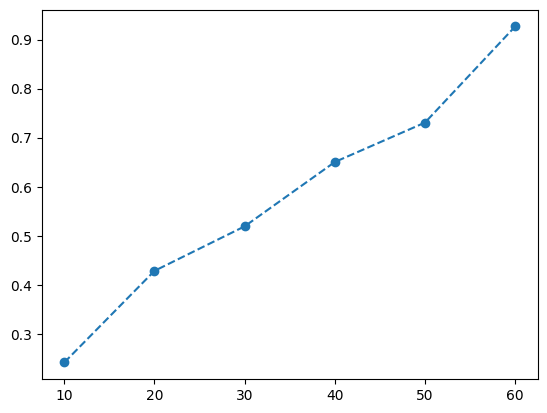

In [63]:
plt.plot(L,[np.max(L_1),np.max(L_2),np.max(L_3),np.max(L_4),np.max(L_5),np.max(L_6)],'o--')

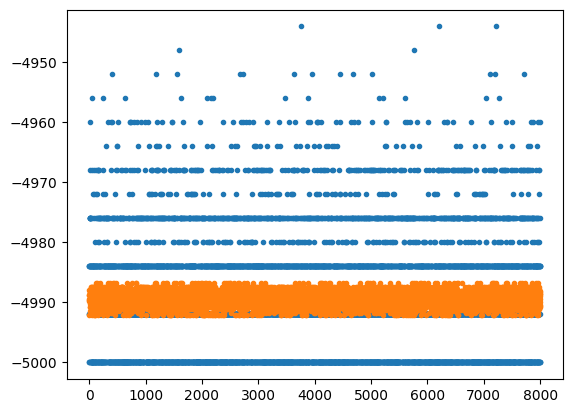

In [ ]:
energy=Energy_simulation_5[1:,15]
new_data = np.array([],dtype=np.float64)
a = data_blocking(energy,100)
for i in range(100):
    new_data = np.append(new_data,bootstrap_data(a))
plt.plot(energy,'.')
plt.plot(new_data,'.')
#plt.xlim(0,len(a)+10)
plt.show()

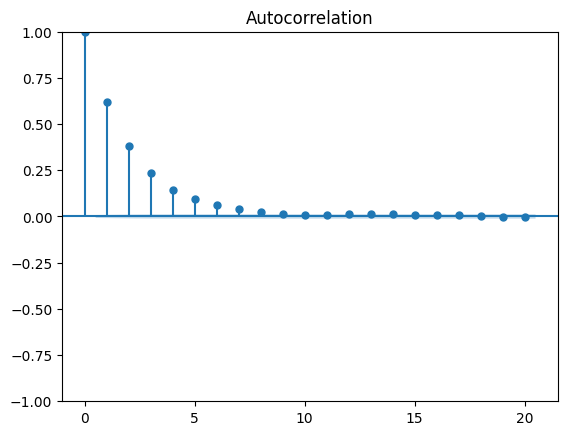

In [96]:
spin_simulation_1 = np.loadtxt("../data/sim_lol.txt").T
new_array = spin_simulation_1[1:,3]
plot_acf(new_array,lags=20)
plt.show()

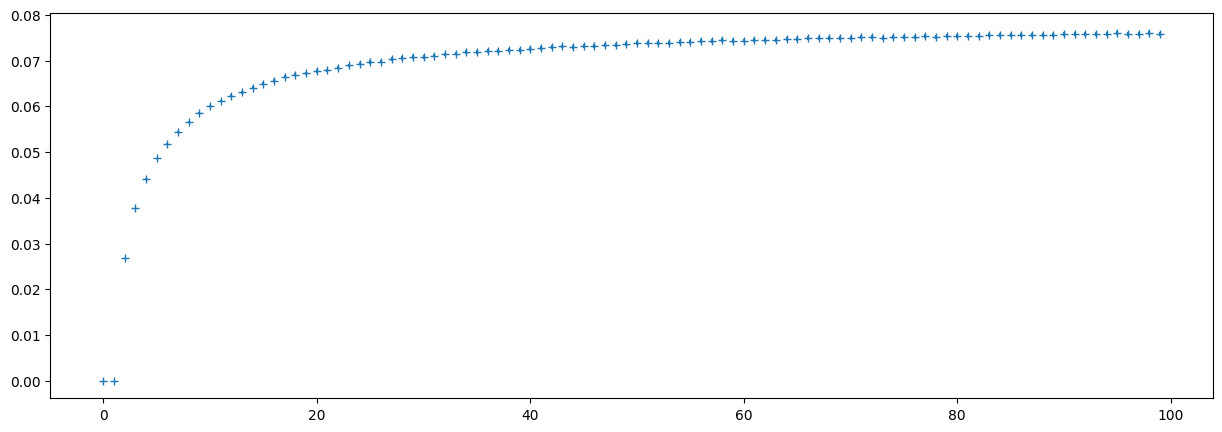

In [97]:
# Finde Blocklaenge
fig,ax = plt.subplots(figsize=(15,5))
length = 100
x_1,y_1,y_err = data_blocking_error(new_array,length)
ax.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.show()

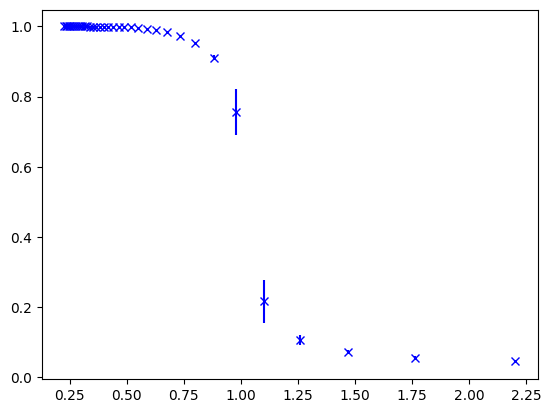

In [61]:
block = 120
length = 120
spin_simulation_plot(spin_simulation_1,block_length=block,boot_length=length,color='b',format='x',label="L = 10")
plt.show()


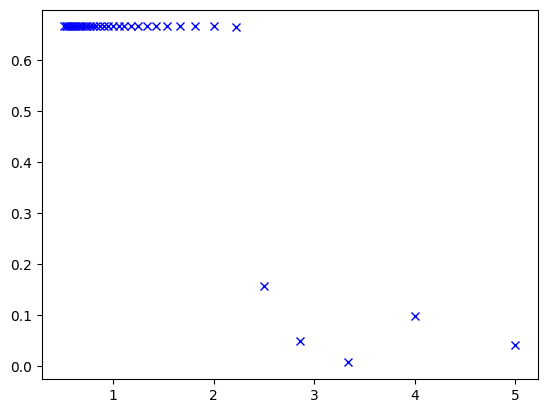

In [170]:
block = 40
length = 40
binder_cum_plot(a,block_length=20,boot_length=50,color='b',format='x',label="L = 10")
plt.show()